<a href="https://colab.research.google.com/github/Gugo-le/ML-study/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘 째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [7]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘 째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터 만 리턴한다.

In [10]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [11]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [12]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print('첫 번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫 번째 샘플의 레이블 : 7


In [14]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [15]:
print(newsdata.data[0]) # 첫 번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [18]:
data.isnull().values.any()

False

In [19]:
print('중 복 을 제 외 한 샘 플 의 수 : {}'.format(data['email'].nunique()))
print('중 복 을 제 외 한 주 제 의 수 : {}'.format(data['target'].nunique()))

중 복 을 제 외 한 샘 플 의 수 : 11314
중 복 을 제 외 한 주 제 의 수 : 20


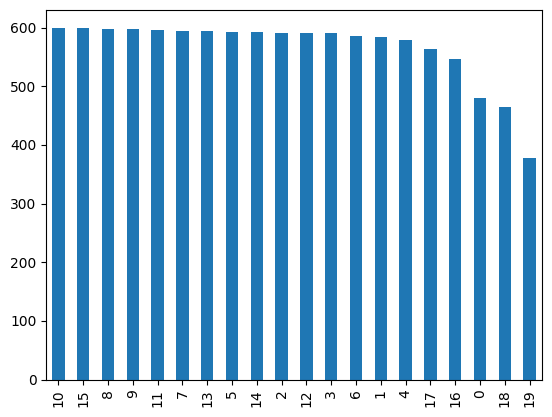

In [20]:
data['target'].value_counts().plot(kind = 'bar');

In [21]:
print(data.groupby('target').size().reset_index(name = 'count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [22]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [23]:
vocab_size = 10000
num_classes = 20

In [24]:
def prepare_data(train_data, test_data, mode): # 전 처 리 함 수

  tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수 만큼의 단어만 사용한다.
  tokenizer.fit_on_texts(train_data)
  X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘 플 수 × vocab_size 크기의 행렬 생성
  X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘 플 수 × vocab_size 크기의 행렬 생성
  return X_train, X_test, tokenizer.index_word

In [25]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인 코 딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인 코 딩

In [26]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [27]:
print('빈도 수 상위 1번 단어: {}'.format(index_to_word[1]))
print('빈도 수 상위 9999번 단어: {}'.format(index_to_word[9999]))

빈도 수 상위 1번 단어: the
빈도 수 상위 9999번 단어: mic


In [28]:
! pip install tensorflow

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[' accuracy'])
  model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
  return score[1]

  modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode+ '모드의 테스트 정확도:', score)

In [33]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode+ '모드의 테스트 정확도:', score)


Epoch 1/5


TypeError: ignored

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

In [37]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [38]:
print('쳇봇 샘플의 개수: ', len(train_data))

쳇봇 샘플의 개수:  11823


In [39]:
# 불필요한 샘플의 개수
print(train_data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


In [42]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    #ex)12시 땡!->12시 땡 !
    sentence = re.sub(r"([?.!,])", r"\1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)


In [41]:
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    #ex)12시 땡!->12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [43]:
print(questions[:5])
print(answers[:5])

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


In [45]:
# 서브 워드 텍스트 인코더를 사용하여 질문, 답변 데이터로부터 단어 집합 생성

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size = 2**13)

In [48]:
# 시작 토큰과 종료 토큰에 대한 정수 부여
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 +2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [47]:
print('시작 토큰 번호: ', START_TOKEN)
print('종료 토큰 번호: ',END_TOKEN)
print('단어 집합의 크기: ', VOCAB_SIZE)

시작 토큰 번호:  [8180]
종료 토큰 번호:  [8181]
단어 집합의 크기:  8182


In [ ]:
# 정수 인코딩과 패딩

In [50]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀 스로 변환.
print(' 임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

 임의의 질문 샘플을 정수 인코딩 : [5766, 611, 3509, 141, 686, 3747, 851]


In [51]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기 # 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]
# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print (' 정 수 인 코 딩 후 의 문 장 {}'.format(tokenized_string))
# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print('기존 문장: {}'.format(original_string))

 정 수 인 코 딩 후 의 문 장 [5766, 611, 3509, 141, 686, 3747, 851]
기존 문장: 가스비 비싼데 감기 걸리겠어


In [53]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브 워드 텍스트 인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위X 형태소 분석 단위X
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
686 ----> 감기 
3747 ----> 걸리
851 ----> 겠어


In [55]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40
#토큰화/정수인코딩/시작토큰과종료토큰추가/패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  for (sentence1, sentence2) in zip(inputs, outputs):
# encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)
#패딩
tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_inputs, maxlen=MAX_LENGTH, padding='post')


NameError: ignored